## California Housing Dataset Loading and Preprocessing
Loading the California Housing dataset and performing initial exploration to understand the data structure and features.

In [ ]:
# Start a new wandb run
wandb.init(project="housing-regression", name="housing-dnn-model")

# Basic imports (reusing most from before)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load California Housing dataset
from sklearn.datasets import fetch_california_housing

# Load data
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert to dataframe for easier handling
df = pd.DataFrame(X, columns=housing.feature_names)
df['PRICE'] = y

# Display basic info about the dataset
print(f"Dataset shape: {df.shape}")
print("\nDataset preview:")
print(df.head())
print("\nTarget variable statistics:")
print(df['PRICE'].describe())

Dataset shape: (20640, 9)

Dataset preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Target variable statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: PRICE, dtype: float64


## Data Preprocessing for Regression
Splitting the dataset into training and testing sets, and standardizing the features to improve model performance.

In [ ]:
with open('model_summary.txt', 'w') as f:
    f.write("# Iris Classification Model Summary\n\n")
    f.write("## Model Architecture\n")
    f.write(str(model.summary()) + "\n\n")

    f.write("## Performance Metrics\n")
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")
    f.write(f"F1 Score: {f1:.4f}\n\n")

    f.write("## Classification Report\n")
    f.write(str(classification_report(y_test_class, y_pred, target_names=class_names)) + "\n\n")

    f.write("## Error Analysis\n")
    if len(incorrect_indices) > 0:
        for idx in incorrect_indices:
            true_class = class_names[y_test_class[idx]]
            pred_class = class_names[y_pred[idx]]
            f.write(f"Sample {idx}: True class = {true_class}, Predicted class = {pred_class}\n")
            f.write(f"Feature values: {X_test[idx]}\n")
            f.write(f"Prediction probabilities: {y_pred_proba[idx]}\n")
            f.write("---\n")
    else:
        f.write("No misclassified samples in the test set!\n")

# Finish wandb run
wandb.finish()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,499 (29.30 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,000 (19.54 KB)

test_accuracy,▁
test_loss,▁
test_accuracy,0.93333
test_loss,0.11101


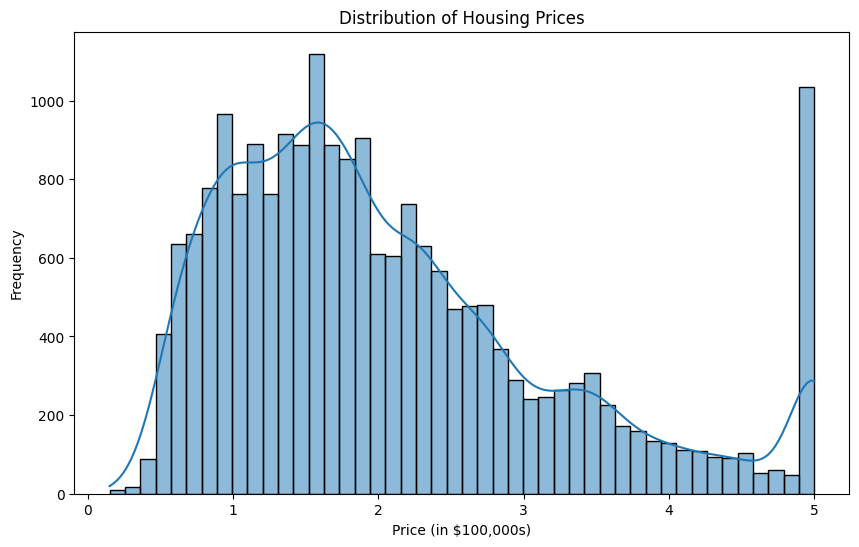

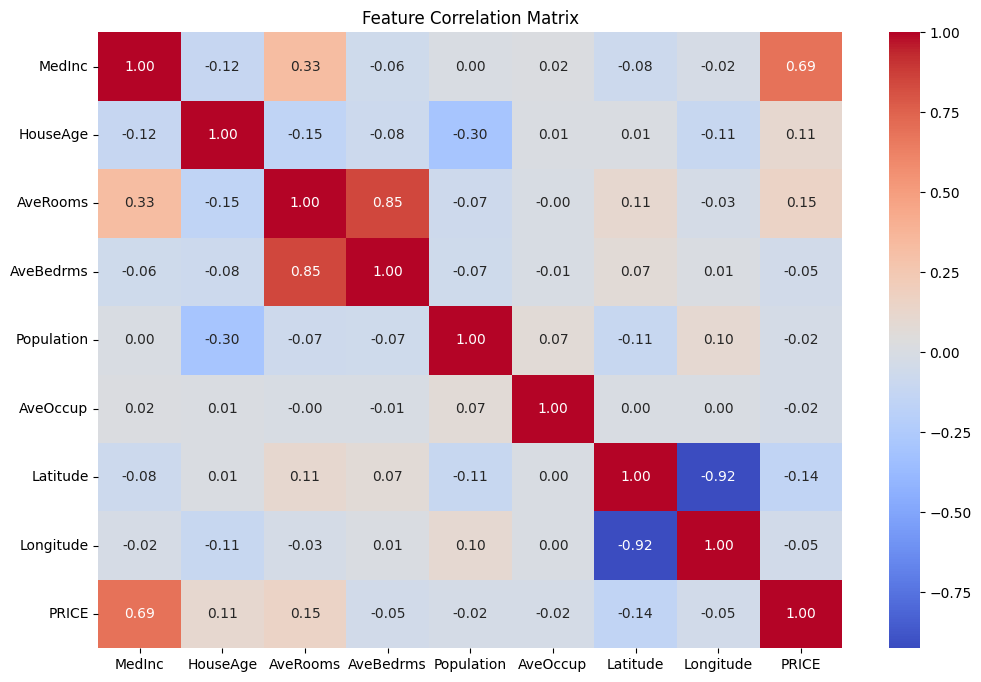

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price (in $100,000s)')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()

# Feature correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.savefig('feature_correlation.png')
plt.show()

## Building the Regression Model
Creating a deep neural network for housing price prediction with multiple layers and ReLU activation.

In [ ]:
# Define the regression model architecture
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # No activation for regression output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error
)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Regression Model
Training the model with early stopping callback to prevent overfitting and tracking with TensorBoard.

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, tensorboard_callback],
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.9920 - mae: 1.0260 - val_loss: 0.5361 - val_mae: 0.5161
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6144 - mae: 0.5705 - val_loss: 0.4596 - val_mae: 0.4772
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4930 - mae: 0.5087 - val_loss: 0.4285 - val_mae: 0.4658
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4564 - mae: 0.4818 - val_loss: 0.4139 - val_mae: 0.4571
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4204 - mae: 0.4655 - val_loss: 0.4185 - val_mae: 0.4542
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4064 - mae: 0.4553 - val_loss: 0.3888 - val_mae: 0.4385
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3897 - mae: 0.4434 - val_loss: 0.3918 - val_mae: 0.4331
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3771 - mae: 0.4361 - val_loss: 0.3919 - val_mae: 0.4364
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/

## Evaluating the Regression Model
Calculating various performance metrics including MAE, MSE, RMSE, and R² score to evaluate model quality.

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Log metrics to wandb
wandb.log({
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
    "r2": r2
})

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Regression Metrics:
Mean Squared Error (MSE): 0.2762
Root Mean Squared Error (RMSE): 0.5256
Mean Absolute Error (MAE): 0.3571
R² Score: 0.7892


## Visualizing Model Performance
Creating visualizations to analyze the training history and prediction accuracy.

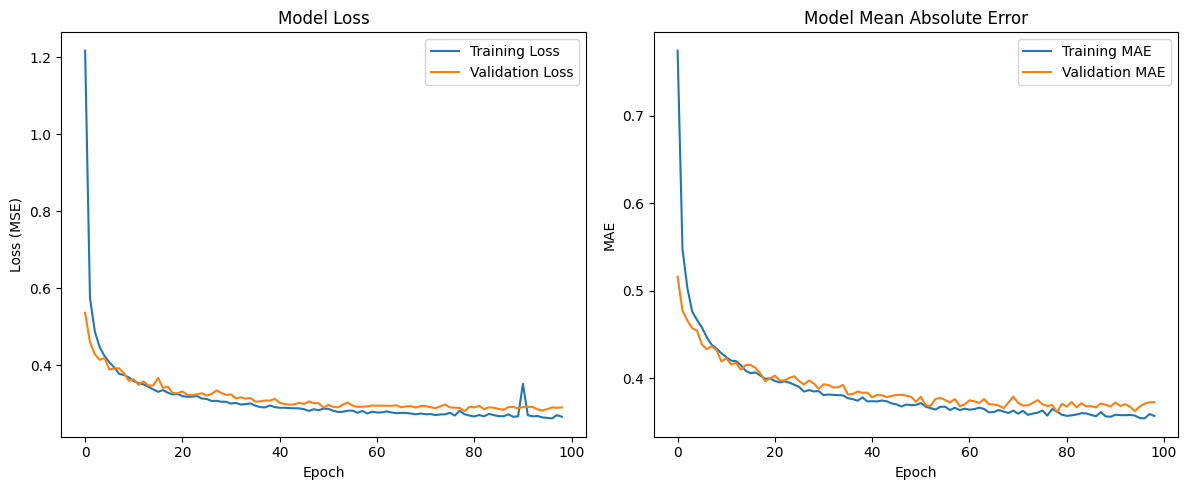

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_regression.png')
plt.show()

# Log to wandb
wandb.log({
    "training_history": wandb.Image('training_history_regression.png')
})

## Comparing Predicted vs Actual Values
Creating a scatter plot to visualize how well our predictions match the actual housing prices.

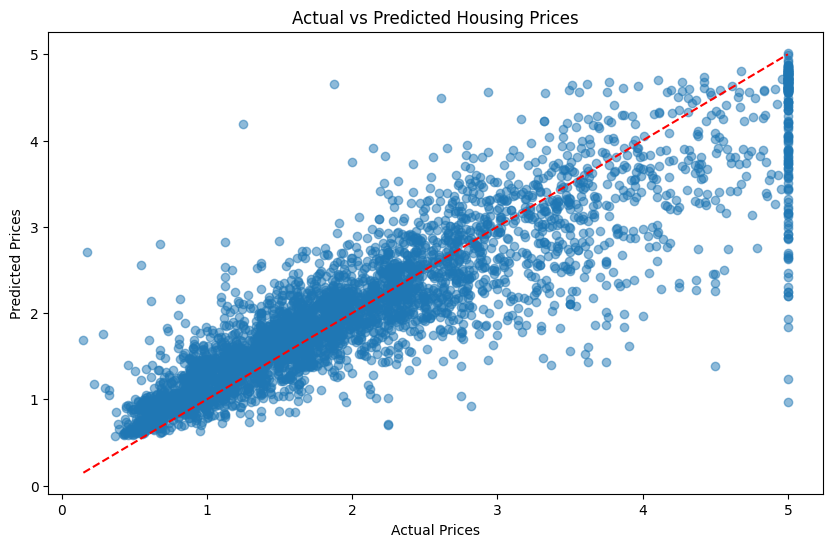

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.savefig('predictions_vs_actual.png')
plt.show()

# Log to wandb
wandb.log({
    "predictions_vs_actual": wandb.Image('predictions_vs_actual.png')
})

## Error Distribution Analysis
Visualizing the error distribution to check for normality and bias in our predictions.

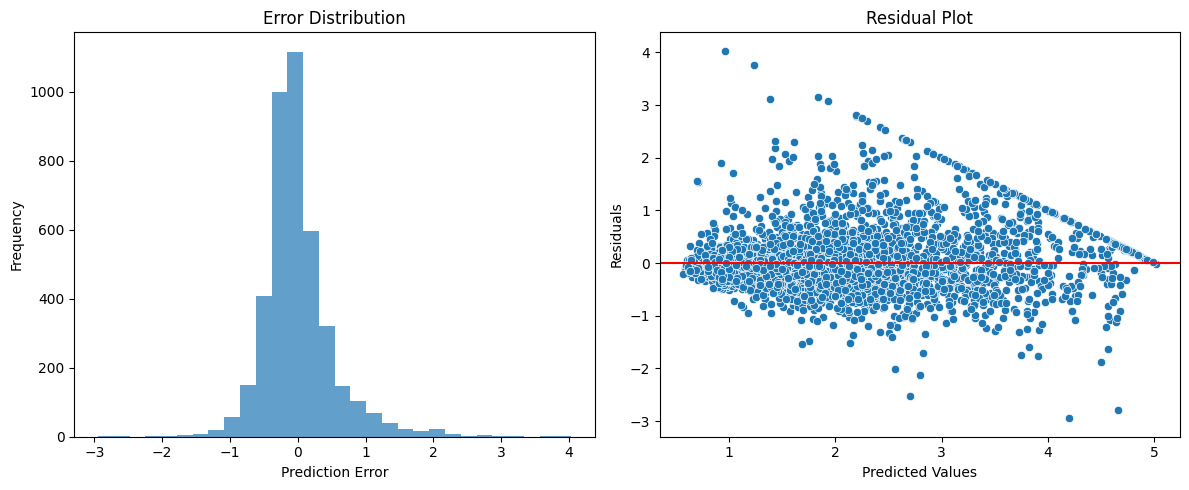

In [ ]:
# Calculate and plot error distribution
errors = y_test - y_pred.flatten()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, alpha=0.7)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred.flatten(), y=errors)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.savefig('error_analysis.png')
plt.show()

# Log to wandb
wandb.log({
    "error_analysis": wandb.Image('error_analysis.png')
})

## Feature Importance Analysis
Analyzing which features have the strongest impact on housing price predictions using a simple approach.

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


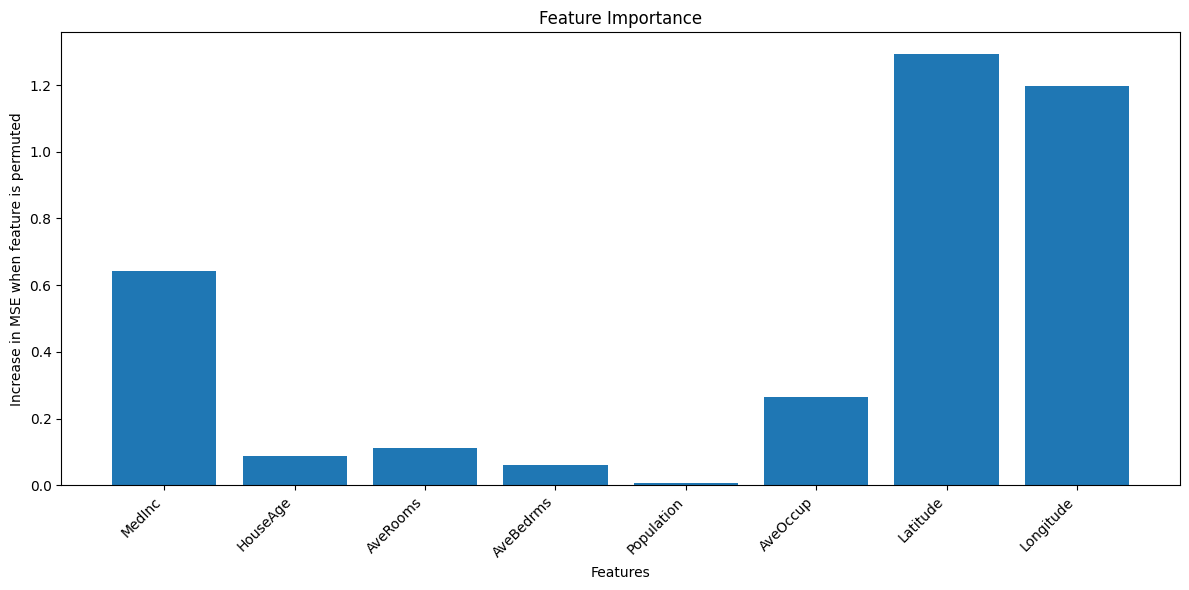

In [ ]:
# Estimate feature importance for regression
feature_importance = np.zeros(X.shape[1])

for i in range(X.shape[1]):
    # Create a permutation of the i-th feature
    X_test_permuted = X_test_scaled.copy()
    X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])

    # Predict with permuted feature
    y_pred_permuted = model.predict(X_test_permuted)

    # Calculate how much the permutation increased the error
    mse_permuted = mean_squared_error(y_test, y_pred_permuted)
    feature_importance[i] = mse_permuted - mse

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(housing.feature_names, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Increase in MSE when feature is permuted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_importance_regression.png')
plt.show()

# Log to wandb
wandb.log({
    "feature_importance": wandb.Image('feature_importance_regression.png')
})

## Model Architecture Visualization
Creating a visual representation of the regression model's neural network architecture.

In [ ]:
# Create a model diagram
from tensorflow.keras.utils import plot_model

# Generate the model diagram
plot_model(model, to_file='regression_model_diagram.png', show_shapes=True, show_layer_names=True)

# Display the model diagram
from IPython.display import Image
Image('regression_model_diagram.png')

# Log to wandb
wandb.log({
    "model_diagram": wandb.Image('regression_model_diagram.png')
})

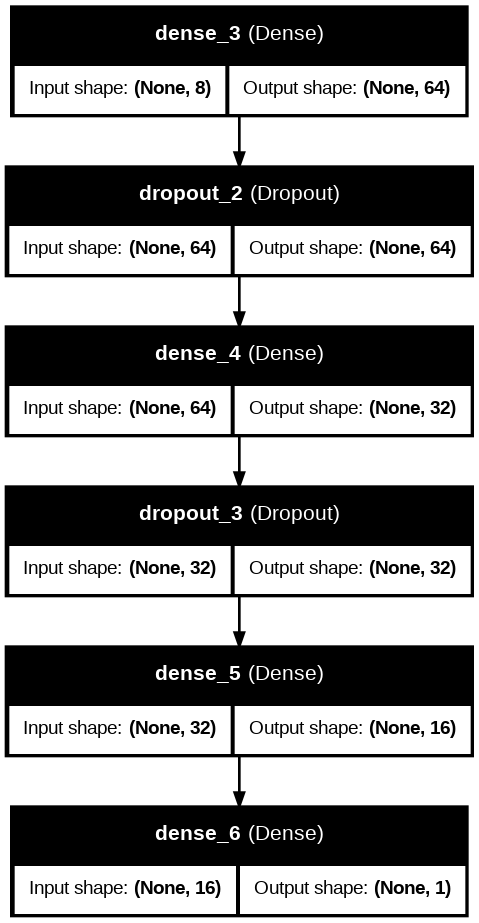

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [ ]:
# Create a model diagram visualization for the regression model
from tensorflow.keras.utils import plot_model

# Generate the model diagram
plot_model(model, to_file='regression_model_diagram.png', show_shapes=True, show_layer_names=True, dpi=96)

# Display the model diagram
from IPython.display import Image
display(Image('regression_model_diagram.png'))

# Print a summary of the regression model architecture
model.summary()

## Creating Comprehensive Model Summary
Generating a summary document with model architecture and performance metrics for the regression task.

In [ ]:
# Log summary to wandb without using wandb.Text
with open('regression_model_summary.txt', 'r') as f:
    summary_text = f.read()

# Just log the most important metrics
wandb.log({
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
    "r2": r2,
    "model_diagram": wandb.Image('regression_model_diagram.png'),
    "feature_importance": wandb.Image('feature_importance_regression.png')
})

# Finish wandb run
wandb.finish()

mae,▁▁
mse,▁▁
r2,▁▁
rmse,▁▁
mae,0.35709
mse,0.27621
r2,0.78922
rmse,0.52556
